In [38]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

plt.rcParams['text.usetex'] = True

In [39]:
def process(data, n):
    data_from_file = np.genfromtxt(data, delimiter=',', skip_header=n)
    data_from_file[:,1] = data_from_file[:,1] - np.mean(data_from_file[:,1])
    return data_from_file

In [40]:
feathering_1 = process('data/Feathering-atom.csv', 7)
flapping_1 = process('data/Flapping-atom.csv', 7)

In [63]:
def sig_process(data):
    peaks = sc.signal.find_peaks(data[:,1], height=0.1)
    roots = np.where(np.diff(np.sign(data[:,1])))[0]
    time_period = np.mean(np.diff(data[peaks[0],0]))
    freq = 1/time_period
    return (peaks, roots, time_period, freq)

In [64]:
feathering_1_peaks, feathering_1_roots, feathering_1_tp, feathering_1_freq = sig_process(feathering_1)
flapping_1_peaks, flapping_1_roots, flapping_1_tp, flapping_1_freq = sig_process(flapping_1)

In [43]:
feathering_1_freq, flapping_1_freq

(0.1663893510815308, 0.16661112962345886)

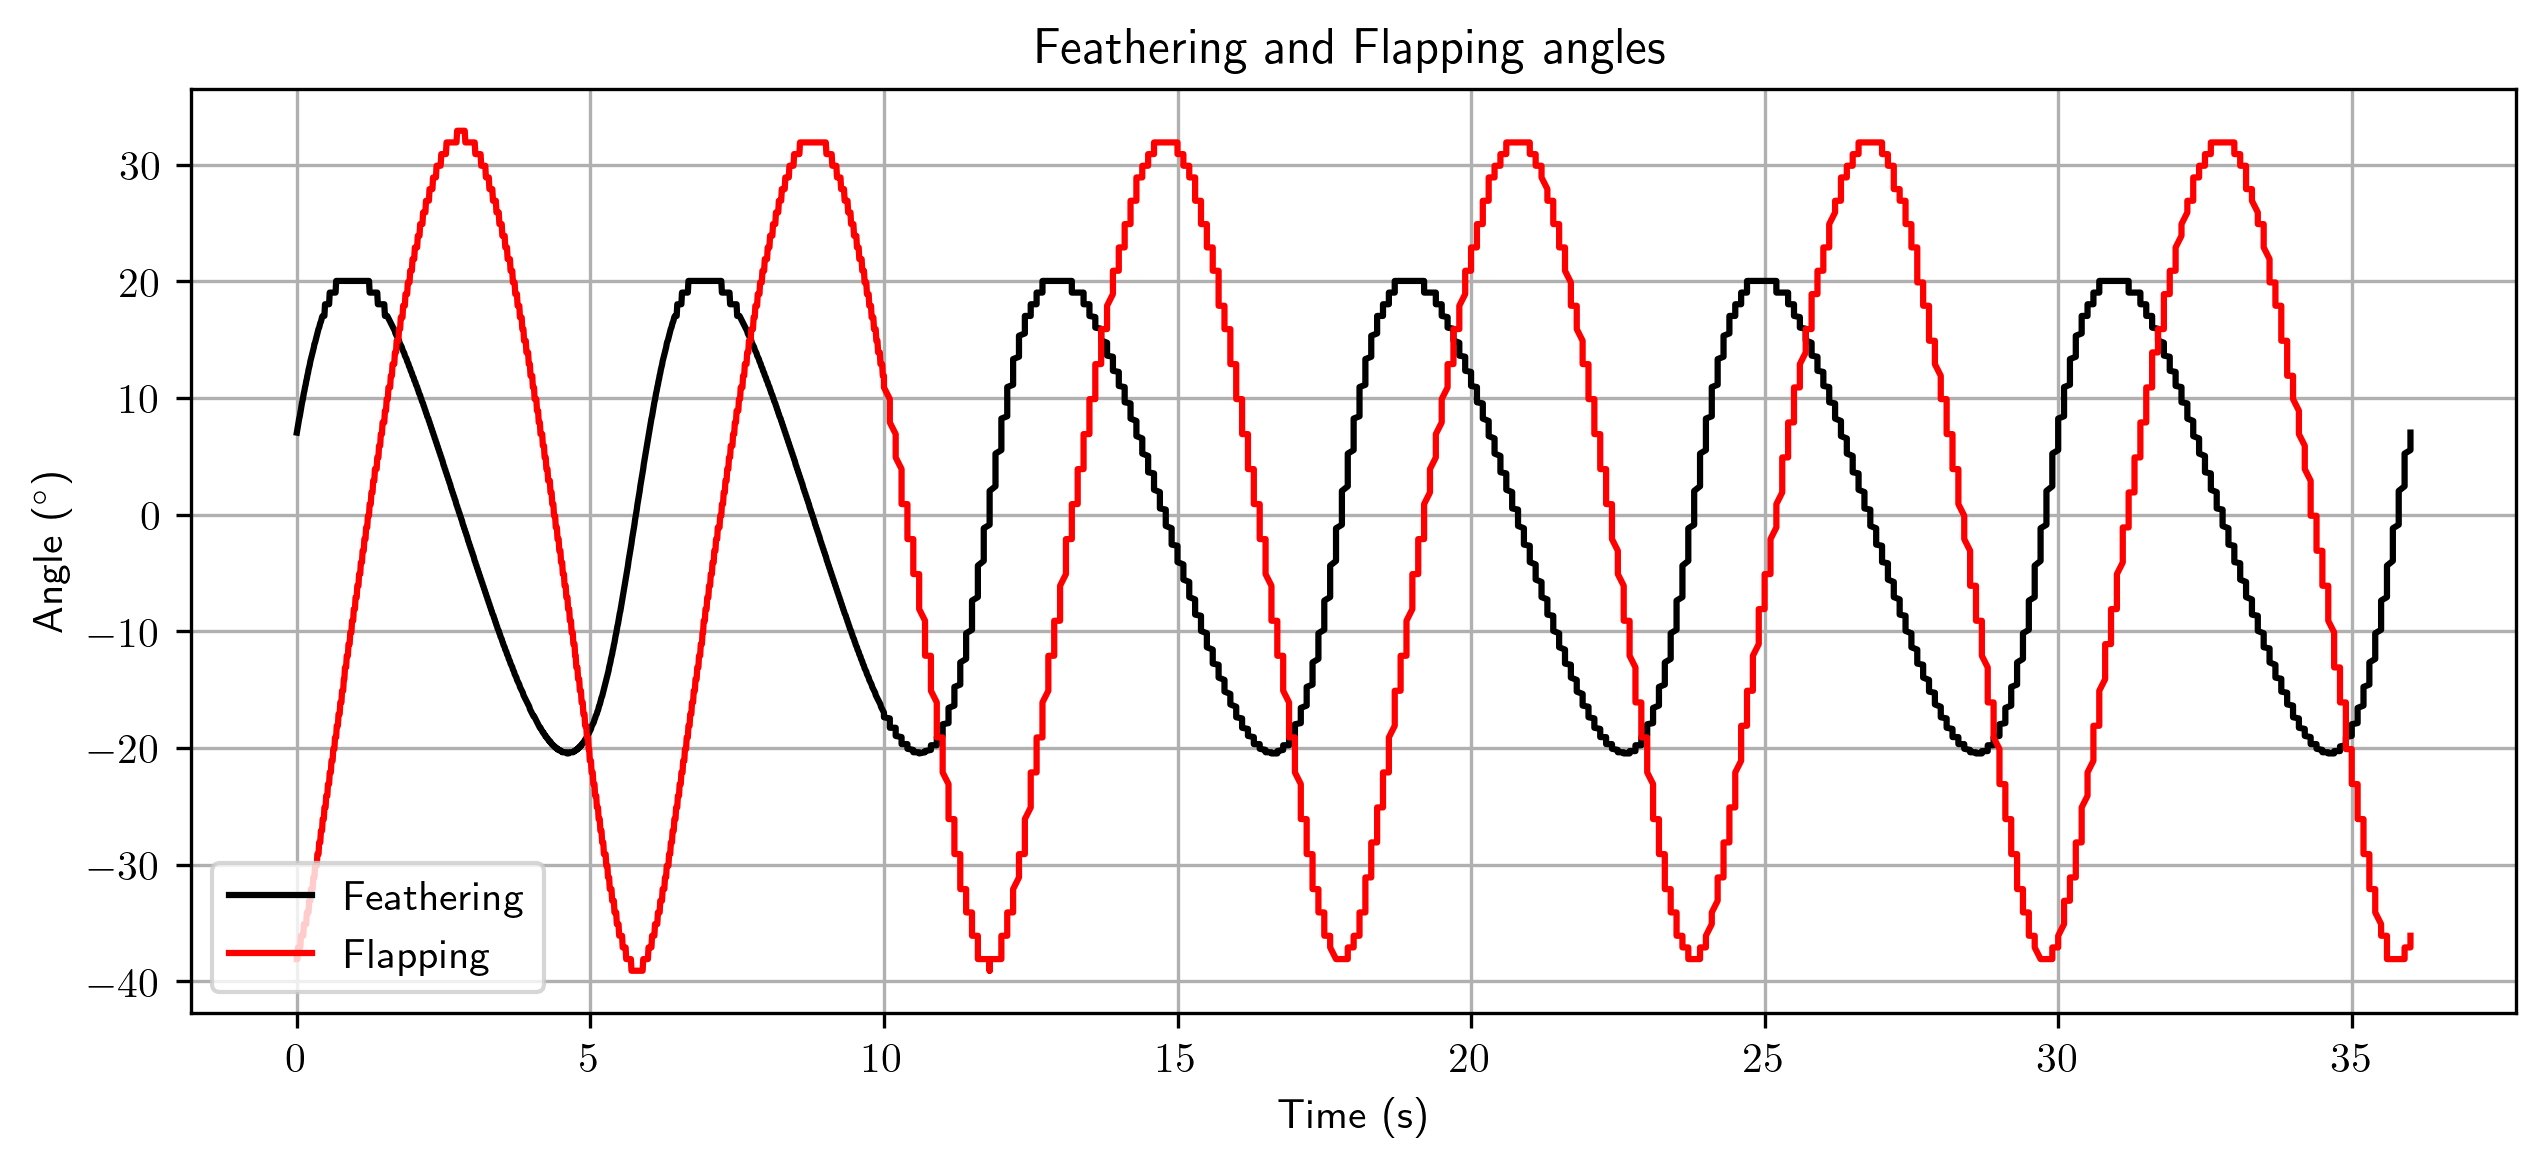

In [66]:
plt.figure(dpi=300, figsize=(10, 4))
plt.plot(feathering_1[:,0], feathering_1[:,1], label='Feathering', c='k')
plt.plot(flapping_1[:,0], flapping_1[:,1], label='Flapping', c='r')
# plt.scatter(feathering_data[feathering_peaks[0],0], feathering_data[feathering_peaks[0],1], c='b')
# plt.scatter(flapping_data[flapping_peaks[0],0], flapping_data[flapping_peaks[0],1], c='g')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle ($^{\circ}$)')
plt.title('Feathering and Flapping angles')
plt.show()

In [67]:
def phase_shift(data1, data2):
    peaks1, roots1, time_period1, freq1 = sig_process(data1)
    peaks2, roots2, time_period2, freq2 = sig_process(data2)
    if(abs(freq1-freq2) <1e-3):
        phase_shift = (data2[:,0][peaks2[0][0]]- data1[:,0][peaks1[0][0]])*360*freq1
        return phase_shift

In [68]:
phase_shift(feathering_1, flapping_1)

110.21630615640599

In [69]:
feathering_2 = process('data/Feathering_2.csv', 7)
flapping_2 = process('data/Flapping_2.csv', 7)

In [70]:
feathering_2_peaks, feathering_2_roots, feathering_2_tp, feathering_2_freq = sig_process(feathering_2)
flapping_2_peaks, flapping_2_roots, flapping_2_tp, flapping_2_freq = sig_process(flapping_2)

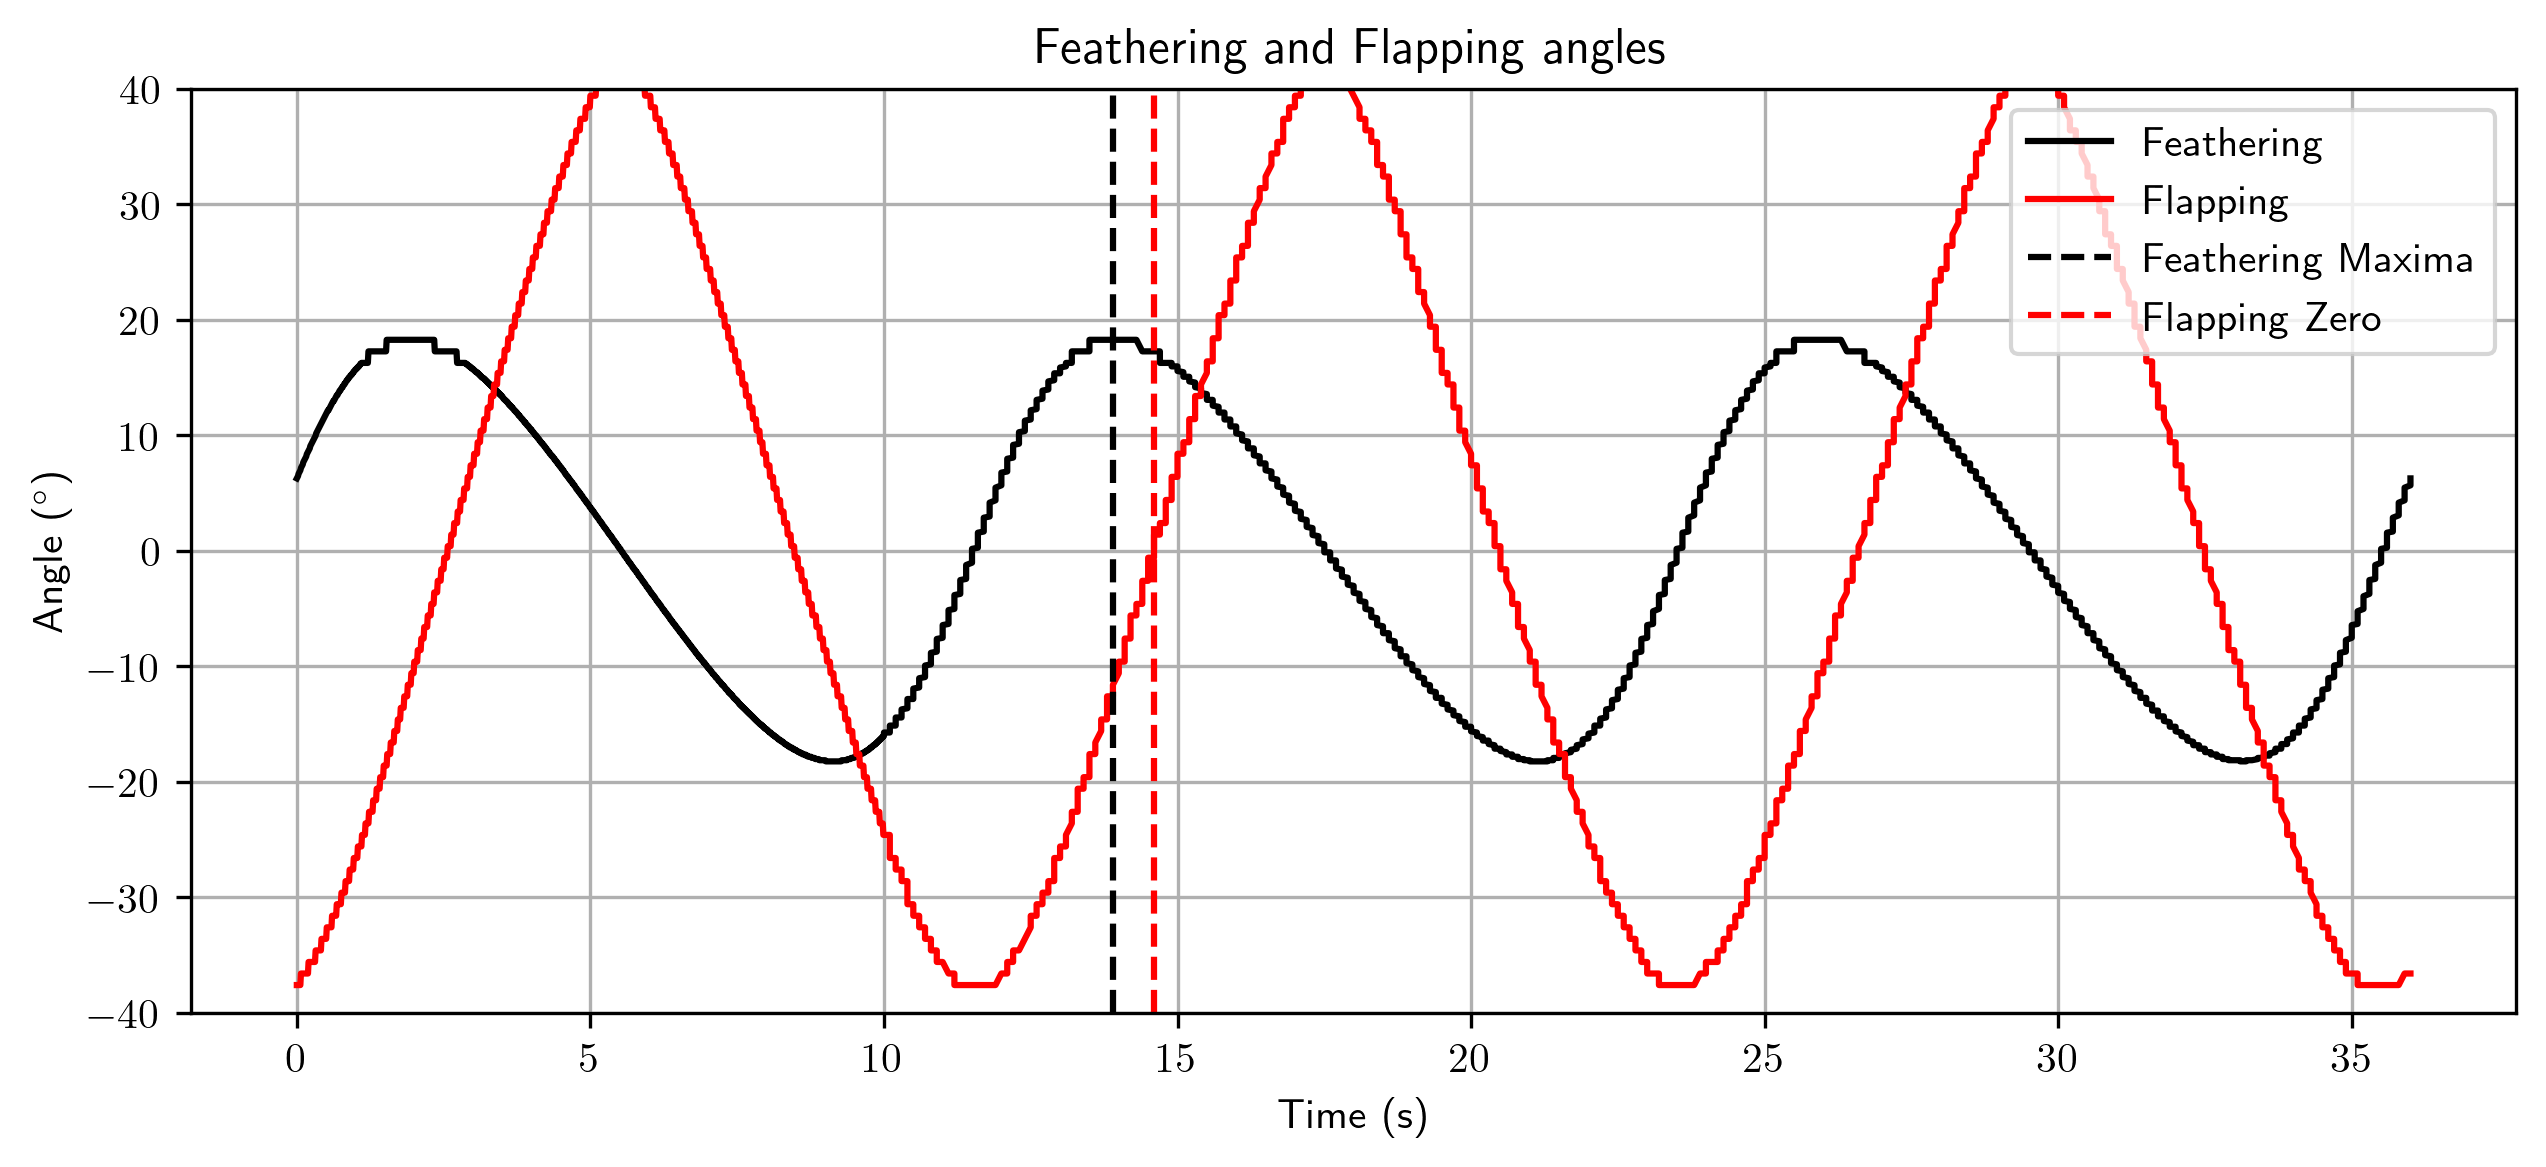

In [75]:
plt.figure(dpi=300, figsize=(10, 4))
plt.plot(feathering_2[:,0], feathering_2[:,1], label='Feathering', c='k')
plt.plot(flapping_2[:,0], flapping_2[:,1], label='Flapping', c='r')
# plt.scatter(feathering_data[feathering_peaks[0],0], feathering_data[feathering_peaks[0],1], c='b')
# plt.scatter(flapping_data[flapping_peaks[0],0], flapping_data[flapping_peaks[0],1], c='g')
plt.vlines(feathering_2[feathering_2_peaks[0],0][1], -40, 40, colors='k', linestyles='dashed', label='Feathering Maxima')
plt.vlines(flapping_2[flapping_2_roots[2],0], -40, 40, colors='r', linestyles='dashed', label='Flapping Zero')
plt.ylim(-40, 40)
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle ($^{\circ}$)')
plt.title('Feathering and Flapping angles')
plt.show()


In [ ]:
phase_shift(feathering_2, flapping_2)

107.53441802252817

In [ ]:
feathering_3 = process('data/Feathering-3.csv', 7)
flapping_3 = process('data/Flapping-3.csv', 7)

In [ ]:
phase_shift(feathering_3, flapping_3)

108.13516896120153

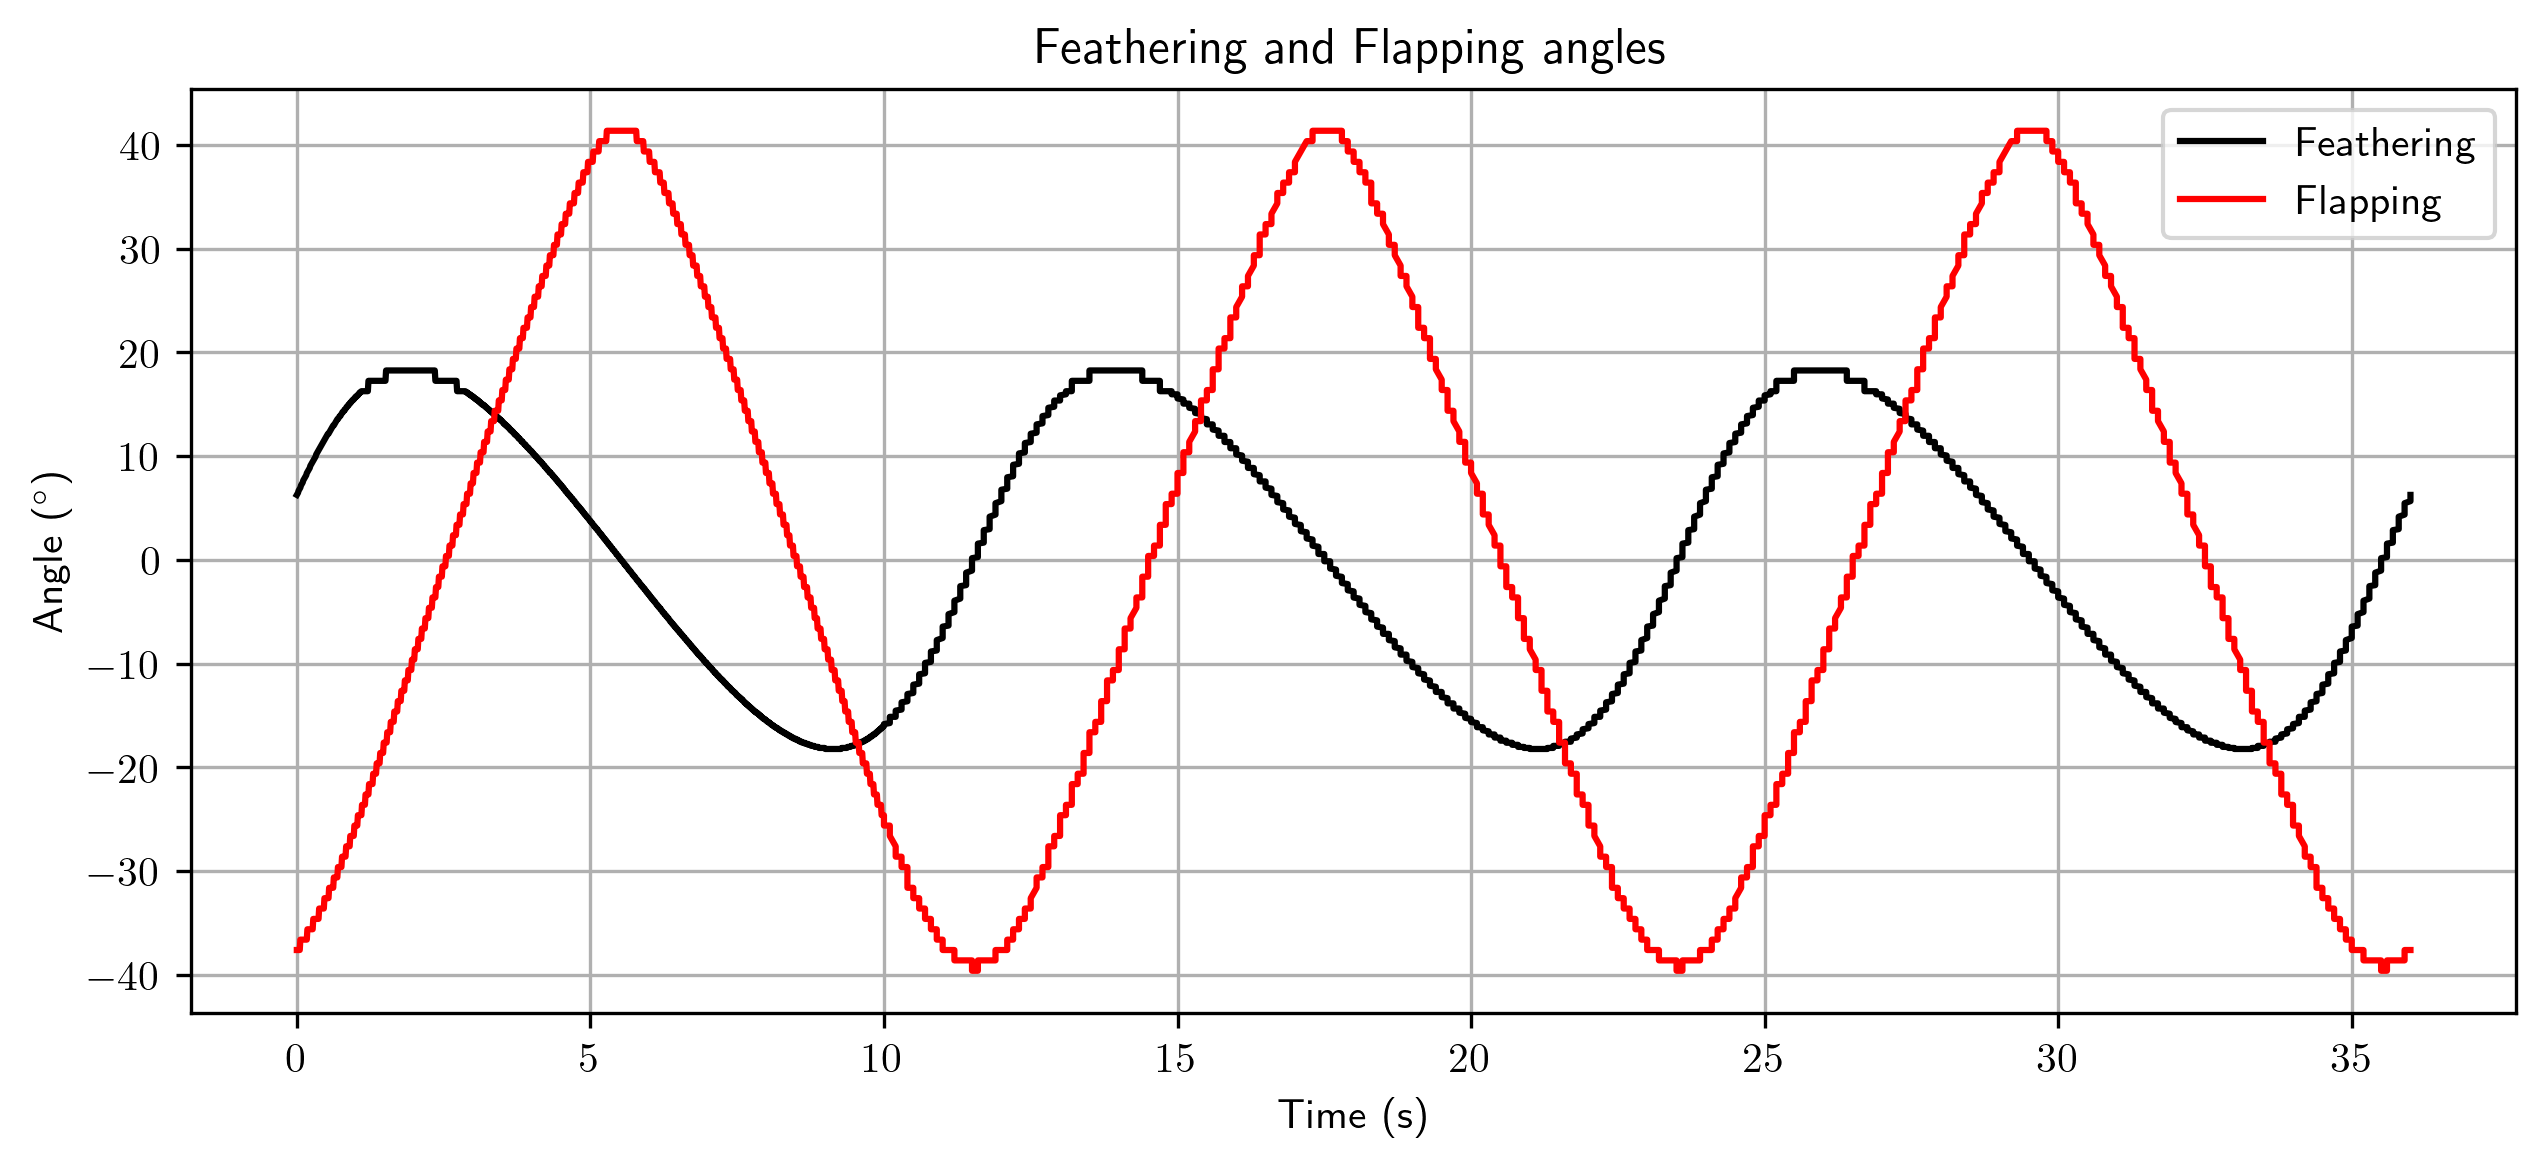

In [ ]:
plt.figure(dpi=300, figsize=(10, 4))
plt.plot(feathering_3[:,0], feathering_3[:,1], label='Feathering', c='k')
plt.plot(flapping_3[:,0], flapping_3[:,1], label='Flapping', c='r')
# plt.scatter(feathering_data[feathering_peaks[0],0], feathering_data[feathering_peaks[0],1], c='b')
# plt.scatter(flapping_data[flapping_peaks[0],0], flapping_data[flapping_peaks[0],1], c='g')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle ($^{\circ}$)')
plt.title('Feathering and Flapping angles')
plt.show()
